# 시계열 데이터 분석(정석)

#### #01. 작업준비
패키지 참조

In [17]:
from pandas import read_excel
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys

In [18]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx")
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


#### #02. 데이터의 정상성 확인
그래프 초기화

In [19]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

#### #02. ARIMA 분석수행
###### 시계열 데이터를 계절 ARIMA 모델에 맞추려고 할 때 첫 번째 목표는 측정항목을 최적하하는 ARIMA(p,d,q)(P,D,Q)s값을 찾는 것

In [20]:
# 기본수행 -> order=(p,d,q)
#model = ARIMA(df['Passengers'], order=(1,2,0))

# 계절성 고려 -> seasonal_order=(P,D,Q,s)
# 월단위 데이터이므로 1년 주기로 보고 주기는 12로 설정(분석가가 직접 판단)
model = ARIMA(df['Passengers'], order=(1,2,0), seasonal_order=(1,2,0,12))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                       Passengers   No. Observations:                  144
Model:             ARIMA(1, 2, 0)x(1, 2, 0, 12)   Log Likelihood                -509.419
Date:                          Fri, 04 Aug 2023   AIC                           1024.838
Time:                                  15:33:45   BIC                           1033.150
Sample:                                       0   HQIC                          1028.213
                                          - 144                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6988      0.078     -9.008      0.000      -0.851      -0.547
ar.S.L12      -0.5743      0.087     -6.606      0.

학습 결과에 대한 예측값 생성

In [21]:
start_index = 0
end_index = len(df['Passengers'])
pd = fit.predict(start=start_index, end=end_index)
pd

0        0.000000
1      195.988808
2      124.026712
3      145.979273
4      126.019141
          ...    
140    477.004006
141    436.744842
142    428.093455
143    435.128564
144    432.016710
Name: predicted_mean, Length: 145, dtype: float64

이후 10 단게의 에측값 생성

In [22]:
fc = fit.forecast(10)
fc

144    432.016710
145    395.569595
146    404.189553
147    459.418748
148    455.818546
149    499.898325
150    589.469959
151    547.689220
152    438.423581
153    376.157403
Name: predicted_mean, dtype: float64

관측치와 에측치의 비교 결과 시각화

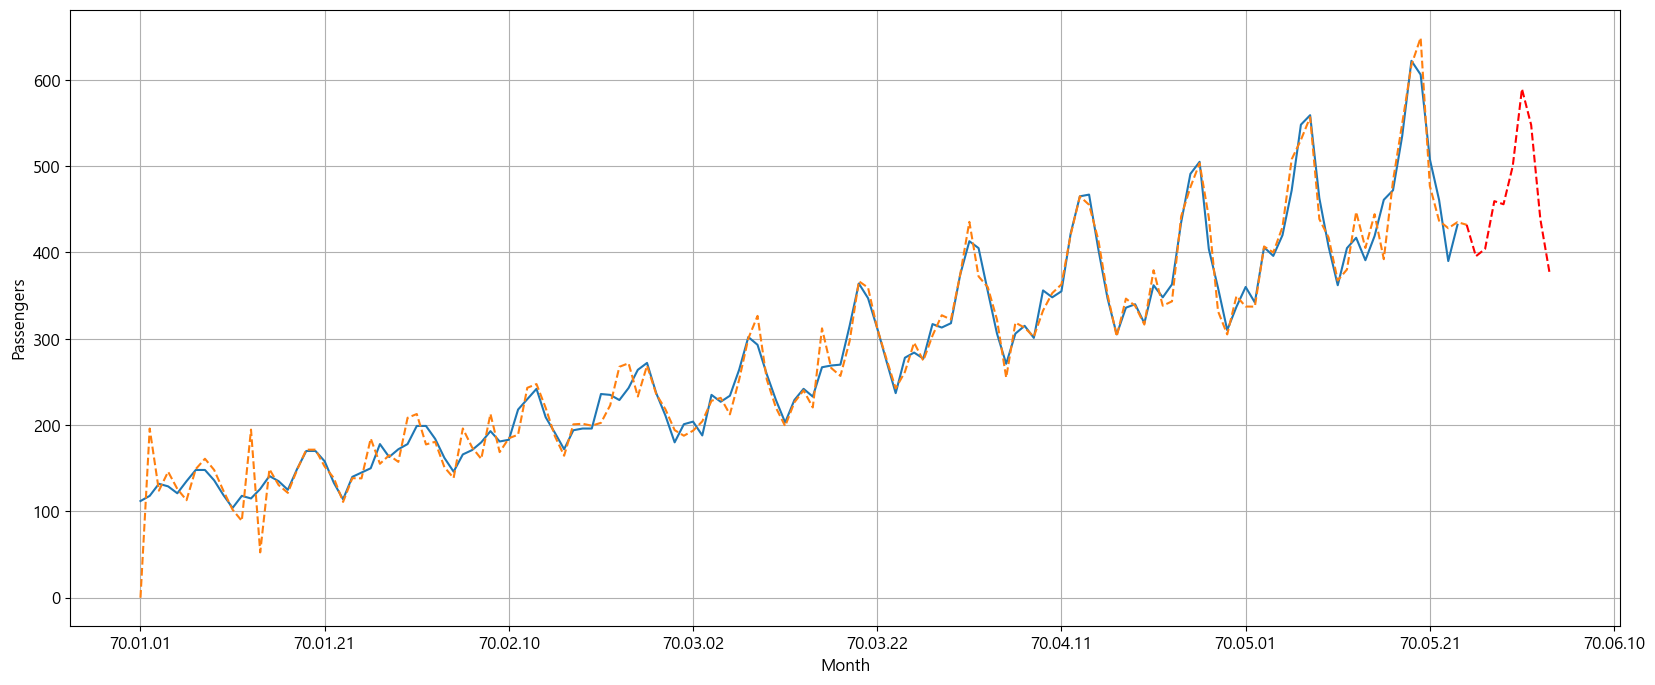

In [23]:
plt.figure(figsize=(20,8))

# 원본
sb.lineplot(x=df.index, y=df['Passengers'])

# 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=pd.index, y=pd, linestyle='--')

# 이후 10단계를 예측한 값
sb.lineplot(x=fc.index, y=fc, linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Passengers')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()